# **Pokemon Data Analysis**

## Data Loading

 **Importing necessary libraries**

In [9]:
import pandas as pd
import numpy as np
import os
# for eda
import seaborn as sns
import matplotlib.pyplot as plt
import squarify
from ast import literal_eval
# For data preprocessing and modelling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV

**Loading Dataset**

In [10]:
df= pd.read_csv('/content/pokemon.csv')

In [11]:
df.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,hp,japanese_name,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,49,5120,70,318,45,Seed Pokémon,49,1059860,0.7,45,Fushigidaneフシギダネ,Bulbasaur,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,62,5120,70,405,45,Seed Pokémon,63,1059860,1.0,60,Fushigisouフシギソウ,Ivysaur,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,100,5120,70,625,45,Seed Pokémon,123,1059860,2.0,80,Fushigibanaフシギバナ,Venusaur,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,52,5120,70,309,45,Lizard Pokémon,43,1059860,0.6,39,Hitokageヒトカゲ,Charmander,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,64,5120,70,405,45,Flame Pokémon,58,1059860,1.1,58,Lizardoリザード,Charmeleon,88.1,5,80,65,80,fire,NaN,19.0,1,0


**Data Set Description**

|    Field Name                   |   Description                                                                 |
|-----------------------|------------------------- ----------------------------------------------------|
| **abilities**| A list of abilities possessed by each Pokémon.
| **against_**| Attributes representing the effectiveness of each Pokémon type against other types (e.g., against_bug, against_dark).
| **attack**| Base attack stat of the Pokémon.
| **defense**| Base defense stat of the Pokémon.
| **sp_attack**| Base special attack stat of the Pokémon.
| **sp_defense**| Base special defense stat of the Pokémon.
| **speed**| Base speed stat of the Pokémon.
| **weight_kg**|Weight of the Pokémon in kilograms.
| **height_m**| Height of the Pokémon in meters.
| **base_total**| The total base stats of the Pokémon.
| **capture_rate**| Capture rate of the Pokémon.
| **classification**| Classification of the Pokémon.
| **experience_growth**| Experience growth rate of the Pokémon.
| **generation**| Generation in which the Pokémon was introduced.
| **is_legendary**| Binary attribute indicating whether the Pokémon is legendary (1) or not (0).
| **japanese_name**| Japanese name of the Pokémon.
| **name**| English name of the Pokémon.
| **percentage_male**| Percentage of male Pokémon in the species.
 |**pokedex_number**| Pokédex number of the Pokémon.
| **type1**| Primary type of the Pokémon.
| **type2**| Secondary type of the Pokémon.

## Data Cleaning and Wrangling

In [12]:
df.describe()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,defense,experience_growth,height_m,hp,percentage_male,pokedex_number,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,8.010000e+02,781.000000,801.000000,703.000000,801.000000,801.000000,801.000000,801.000000,781.000000,801.000000,801.000000
mean,0.996255,1.057116,0.968789,1.073970,1.068976,1.065543,1.135456,1.192884,0.985019,1.034020,1.098002,1.208177,0.887016,0.975343,1.005306,1.250312,0.983458,1.058365,77.857678,7191.011236,65.362047,428.377029,73.008739,1.054996e+06,1.163892,68.958801,55.155761,401.000000,71.305868,70.911361,66.334582,61.378105,3.690387,0.087391
std,0.597248,0.438142,0.353058,0.654962,0.522167,0.717251,0.691853,0.604488,0.558256,0.788896,0.738818,0.735356,0.266106,0.549375,0.495183,0.697148,0.500117,0.606562,32.158820,6558.220422,19.598948,119.203577,30.769159,1.602558e+05,1.080326,26.576015,20.261623,231.373075,32.353826,27.942501,28.907662,109.354766,1.930420,0.282583
min,0.250000,0.250000,0.000000,0.000000,0.250000,0.000000,0.250000,0.250000,0.000000,0.250000,0.000000,0.250000,0.000000,0.000000,0.000000,0.250000,0.250000,0.250000,5.000000,1280.000000,0.000000,180.000000,5.000000,6.000000e+05,0.100000,1.000000,0.000000,1.000000,10.000000,20.000000,5.000000,0.100000,1.000000,0.000000
25%,0.500000,1.000000,1.000000,0.500000,1.000000,0.500000,0.500000,1.000000,1.000000,0.500000,1.000000,0.500000,1.000000,0.500000,1.000000,1.000000,0.500000,0.500000,55.000000,5120.000000,70.000000,320.000000,50.000000,1.000000e+06,0.600000,50.000000,50.000000,201.000000,45.000000,50.000000,45.000000,9.000000,2.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,75.000000,5120.000000,70.000000,435.000000,70.000000,1.000000e+06,1.000000,65.000000,50.000000,401.000000,65.000000,66.000000,65.000000,27.300000,4.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,100.000000,6400.000000,70.000000,505.000000,90.000000,1.059860e+06,1.500000,80.000000,50.000000,601.000000,91.000000,90.000000,85.000000,64.800000,5.000000,0.000000
max,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000,4.000000,4.000000,4.000000,4.000000,4.000000,185.000000,30720.000000,140.000000,780.000000,230.000000,1.640000e+06,14.500000,255.000000,100.000000,801.000000,194.000000,230.000000,180.000000,999.900000,7.000000,1.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          801 non-null    object 
 1   against_bug        801 non-null    float64
 2   against_dark       801 non-null    float64
 3   against_dragon     801 non-null    float64
 4   against_electric   801 non-null    float64
 5   against_fairy      801 non-null    float64
 6   against_fight      801 non-null    float64
 7   against_fire       801 non-null    float64
 8   against_flying     801 non-null    float64
 9   against_ghost      801 non-null    float64
 10  against_grass      801 non-null    float64
 11  against_ground     801 non-null    float64
 12  against_ice        801 non-null    float64
 13  against_normal     801 non-null    float64
 14  against_poison     801 non-null    float64
 15  against_psychic    801 non-null    float64
 16  against_rock       801 non

**Missing Values**

In [14]:
df.isna().sum()[df.columns[df.isna().any()]]

height_m            20
percentage_male     98
type2              384
weight_kg           20
dtype: int64

**Data Shape**

In [15]:
df.shape

(801, 41)

In [16]:
df.columns

Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'japanese_name', 'name', 'percentage_male', 'pokedex_number',
       'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg',
       'generation', 'is_legendary'],
      dtype='object')

**Removing Unwanted Columns and Recreating Necessary Columns for analysis**

In [17]:
df.drop(columns=['japanese_name', 'pokedex_number', 'base_egg_steps', 'classfication', 'percentage_male'], axis=1, inplace=True)

In [18]:
df["abilities"] = df.apply(lambda x: literal_eval(x["abilities"]), axis=1)
df["abilities"]

0      [Overgrow, Chlorophyll]
1      [Overgrow, Chlorophyll]
2      [Overgrow, Chlorophyll]
3         [Blaze, Solar Power]
4         [Blaze, Solar Power]
                ...           
796              [Beast Boost]
797              [Beast Boost]
798              [Beast Boost]
799              [Prism Armor]
800               [Soul-Heart]
Name: abilities, Length: 801, dtype: object

In [19]:
df["n_abilities"] = df.apply(lambda x: len(x["abilities"]), axis=1)
df["n_abilities"]

0      2
1      2
2      2
3      2
4      2
      ..
796    1
797    1
798    1
799    1
800    1
Name: n_abilities, Length: 801, dtype: int64

In [20]:
df["type"] = df["type1"].astype(str) +' ' + df["type2"]
df['type']

0      grass poison
1      grass poison
2      grass poison
3               NaN
4               NaN
           ...     
796    steel flying
797     grass steel
798     dark dragon
799             NaN
800     steel fairy
Name: type, Length: 801, dtype: object

In [21]:
df.columns #rechecking the columns

Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_happiness', 'base_total', 'capture_rate', 'defense',
       'experience_growth', 'height_m', 'hp', 'name', 'sp_attack',
       'sp_defense', 'speed', 'type1', 'type2', 'weight_kg', 'generation',
       'is_legendary', 'n_abilities', 'type'],
      dtype='object')

## Exploratory Data Analysis (EDA)

### Pokemon Types Analysis

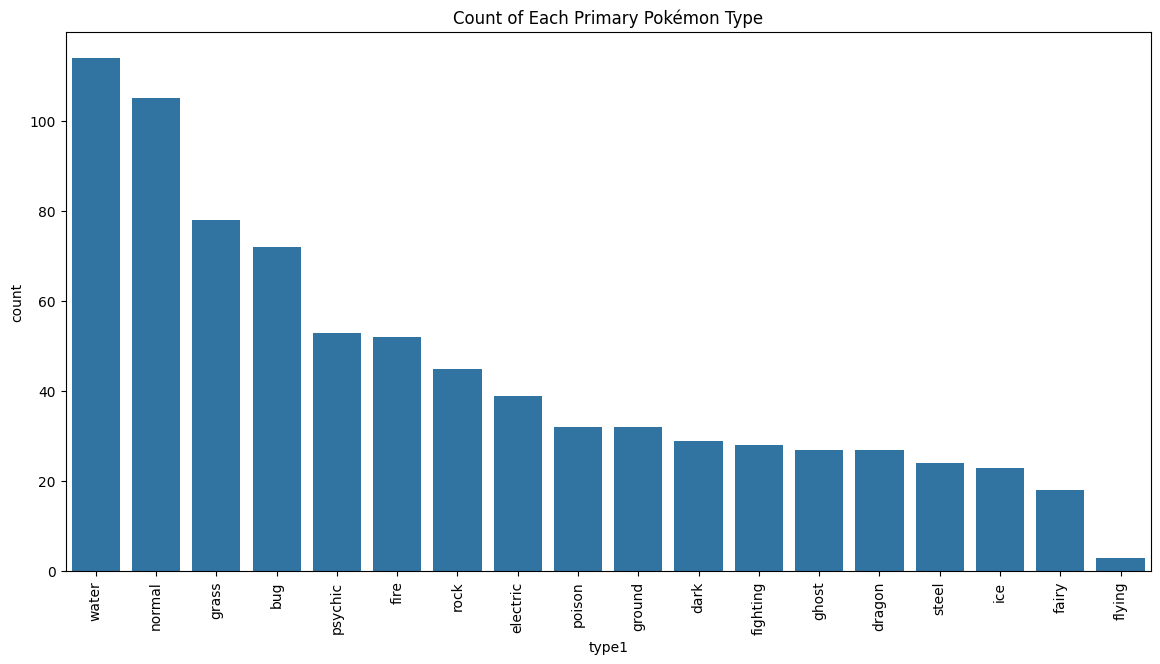

In [22]:
# Count of each Pokémon type
plt.figure(figsize=(14, 7))
sns.countplot(data=df, x='type1', order=df['type1'].value_counts().index)
plt.title('Count of Each Primary Pokémon Type')
plt.xticks(rotation=90)
plt.show()

**Report :** Water Type is the most common primary type and Flying Type is the rarest type

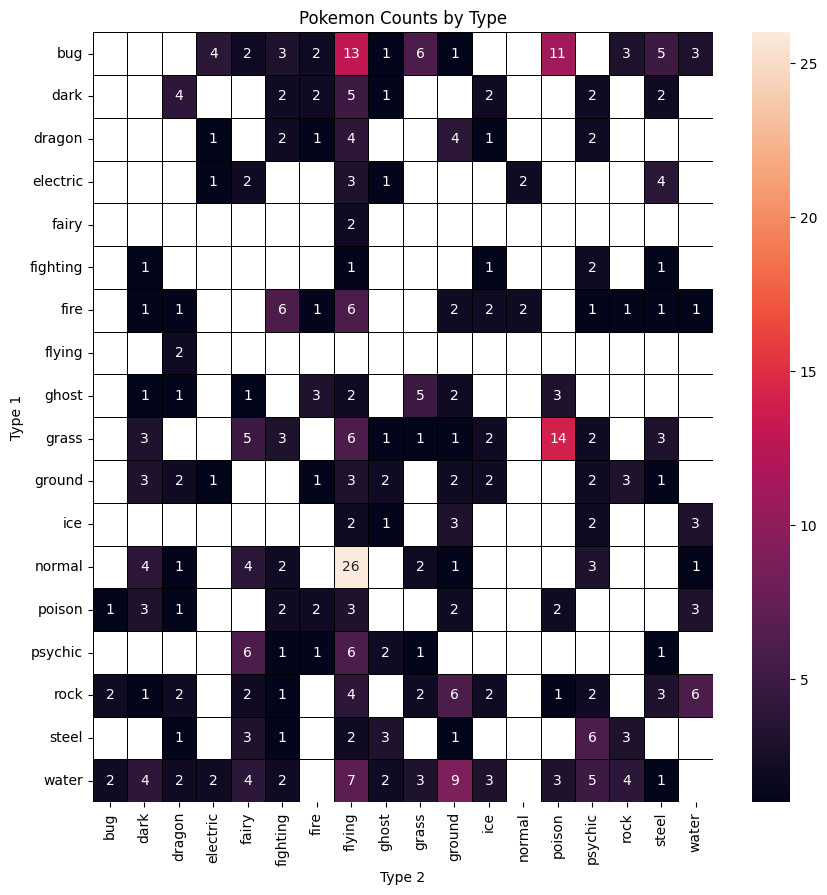

In [23]:
plt.figure(figsize=(10, 10))
sns.heatmap(
    df[df['type2'] != 'None'].groupby(['type1', 'type2']).size().unstack(),
    annot=True, linewidths=.4, linecolor='black'
    )
plt.xlabel('Type 2')
plt.ylabel('Type 1')
plt.title('Pokemon Counts by Type')
plt.show()

**Report :**

- From Primary(Type 1) to Secondary(Type 2) conversion , Water Type transforms the most , we have already seen it's abdundance.
- The most common type 2 converted type is Flying and normal type pokemon transfor to this type the most , followed by bug type.

In [24]:
df['type2'].fillna('None', inplace=True)

**Squared Word Cloud Visualization of the Types**

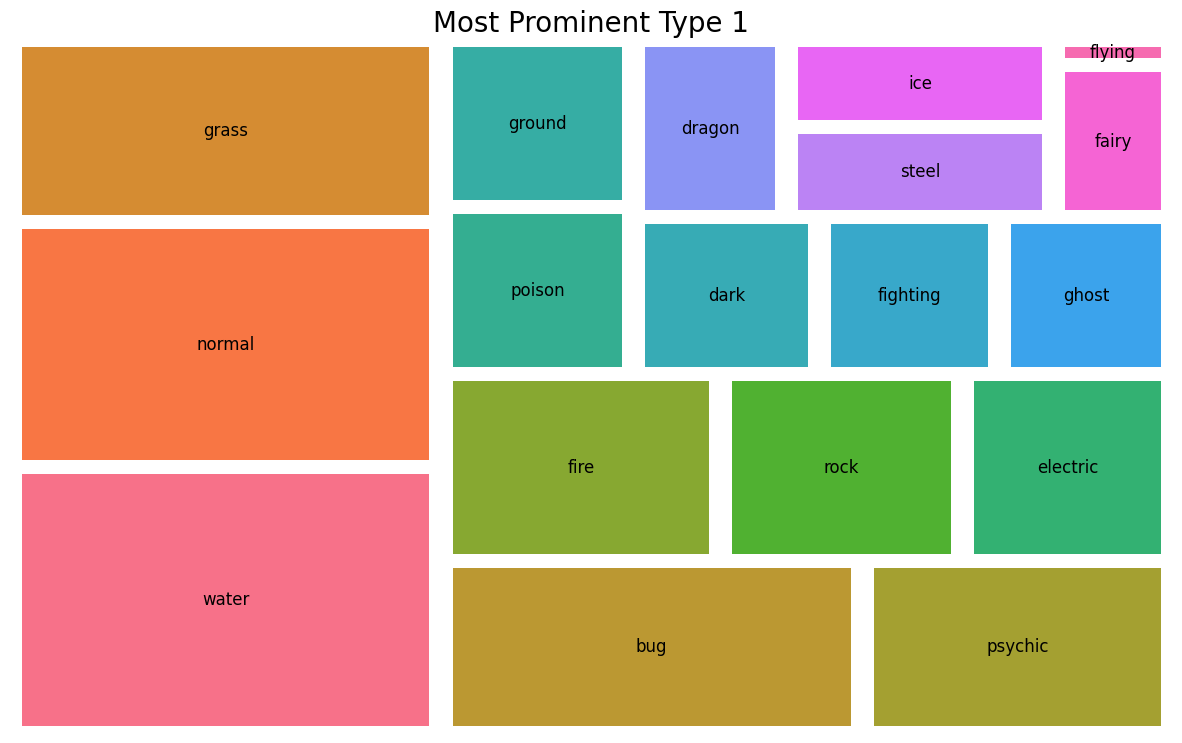

In [25]:
# Type 1 Primary

valc_type1 = df['type1'].value_counts()

plt.figure(figsize=(15, 9))
ax1 = squarify.plot(
    sizes=valc_type1,
    label=valc_type1.index,
    color=sns.color_palette('husl', len(valc_type1)),
    pad=0.8,
    text_kwargs={'fontsize': 12}
)
ax1.set_title("Most Prominent Type 1", fontsize=20)
plt.axis('off')
plt.show()

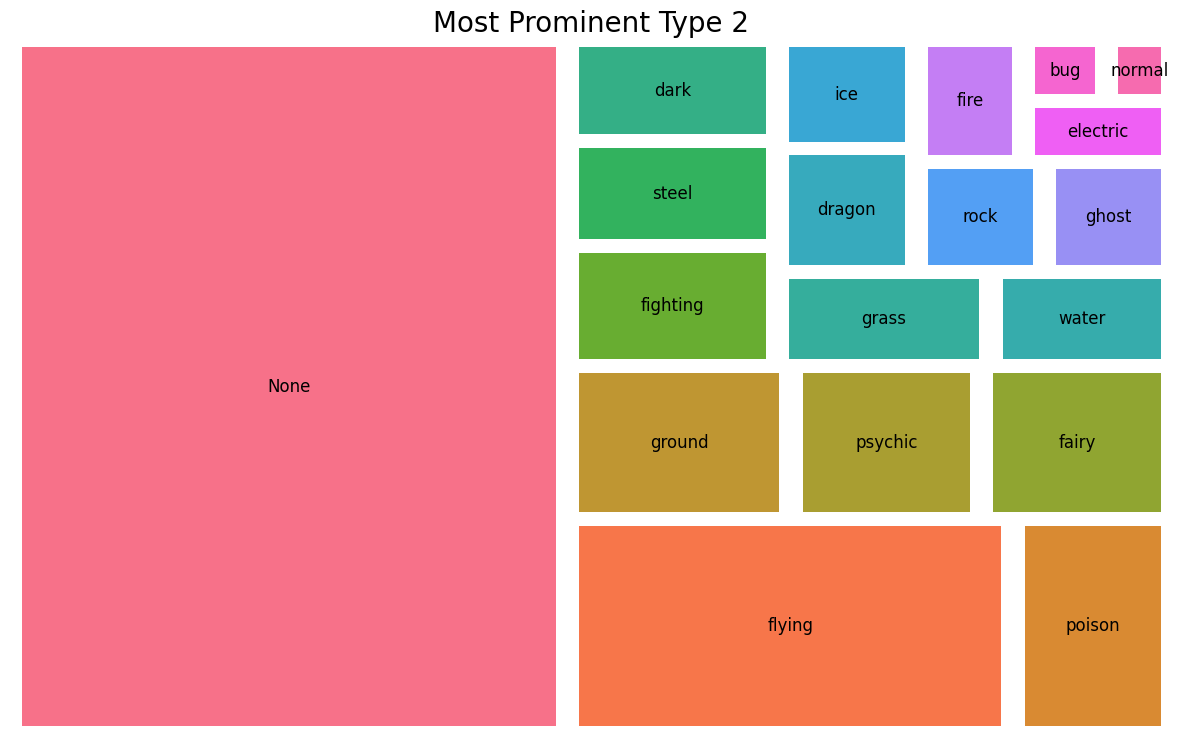

In [26]:
# Type 2 Secondary

valc_type2 = df['type2'].value_counts()

plt.figure(figsize=(15, 9))
ax2 = squarify.plot(
    sizes=valc_type2,
    label=valc_type2.index,
    color=sns.color_palette('husl', len(valc_type2)),
    pad=0.8,
    text_kwargs={'fontsize': 12}
)
ax2.set_title("Most Prominent Type 2", fontsize=20)
plt.axis('off')
plt.show()

### Generation Based Analysis

**Grouping based on Generation on Legendary and Non-Legendary Pokemon**

In [27]:
df.groupby('generation')['is_legendary'].value_counts()

generation  is_legendary
1           0               146
            1                 5
2           0                94
            1                 6
3           0               125
            1                10
4           0                94
            1                13
5           0               143
            1                13
6           0                66
            1                 6
7           0                63
            1                17
Name: count, dtype: int64

**Base Stat over Generations**

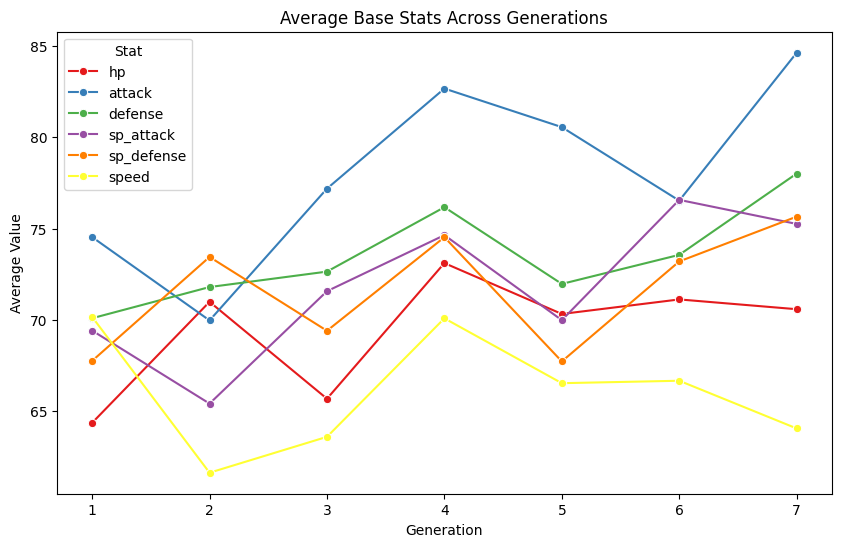

In [28]:
base_stats = ['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']

plt.figure(figsize=(10, 6))
generation_stats = df.groupby('generation')[base_stats].mean().reset_index()
generation_stats = generation_stats.melt(id_vars='generation', value_vars=base_stats, var_name='Stat', value_name='Average Value')
sns.lineplot(data=generation_stats, x='generation', y='Average Value', hue='Stat', marker='o',palette=sns.color_palette("Set1", len(base_stats)))
plt.title('Average Base Stats Across Generations')
plt.xlabel('Generation')
plt.ylabel('Average Value')
plt.legend(title='Stat')
plt.show()


### Capture Rate Based Analysis

In [29]:
df['capture_rate'] = pd.to_numeric(df['capture_rate'], errors='coerce')

**Count of Capture Rate**

[Text(0.5, 1.0, 'Distribution of Pokémon Capture Rate')]

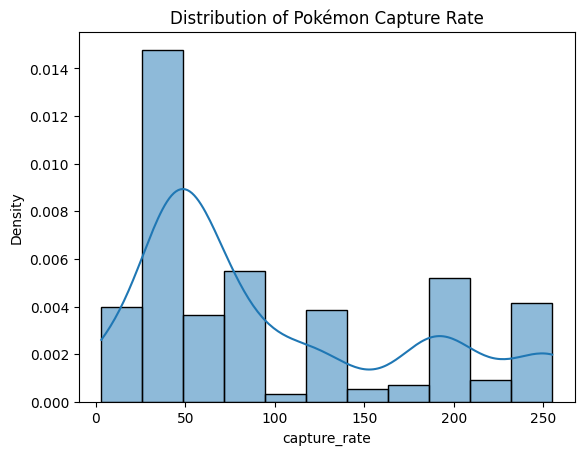

In [30]:
sns.histplot(df['capture_rate'], kde=True, stat='density').set(title='Distribution of Pokémon Capture Rate')

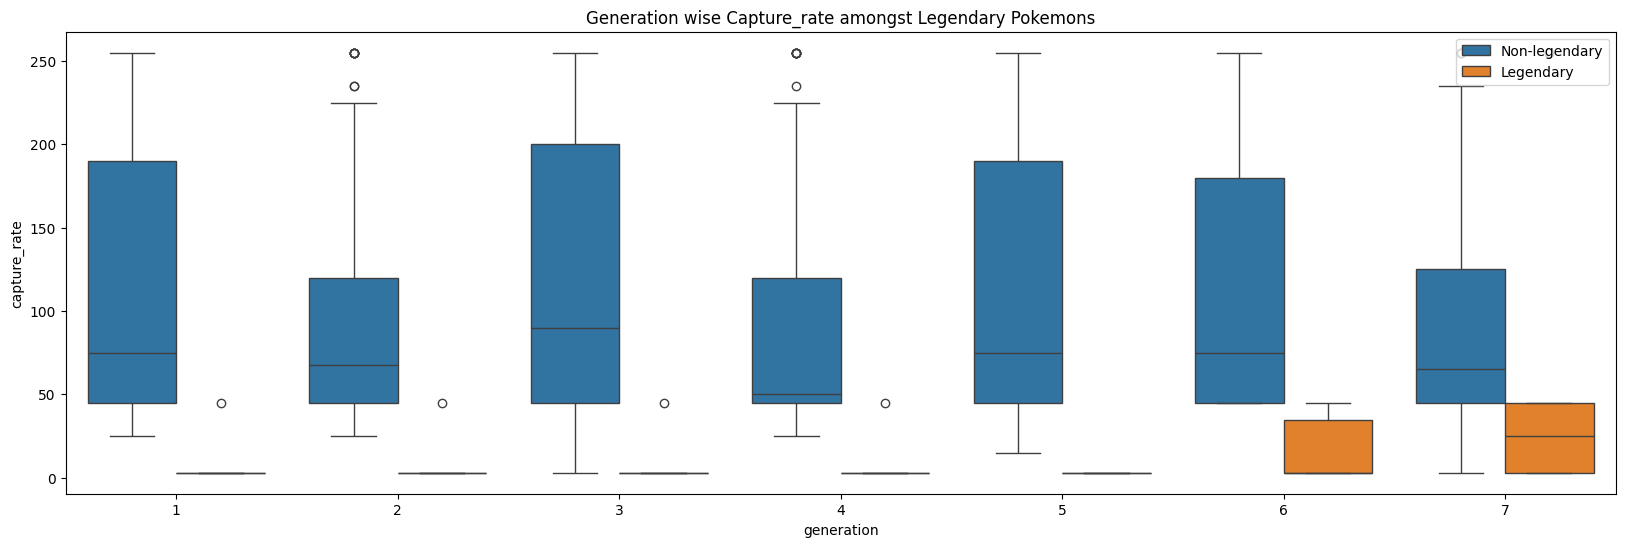

In [31]:
plt.figure(figsize=(20,6))
ax = sns.boxplot(x='generation',y='capture_rate',hue='is_legendary',data=df)

ax.set_title("Generation wise Capture_rate amongst Legendary Pokemons")
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles,["Non-legendary", "Legendary"],loc='upper right')


<Axes: xlabel='type1', ylabel='capture_rate'>

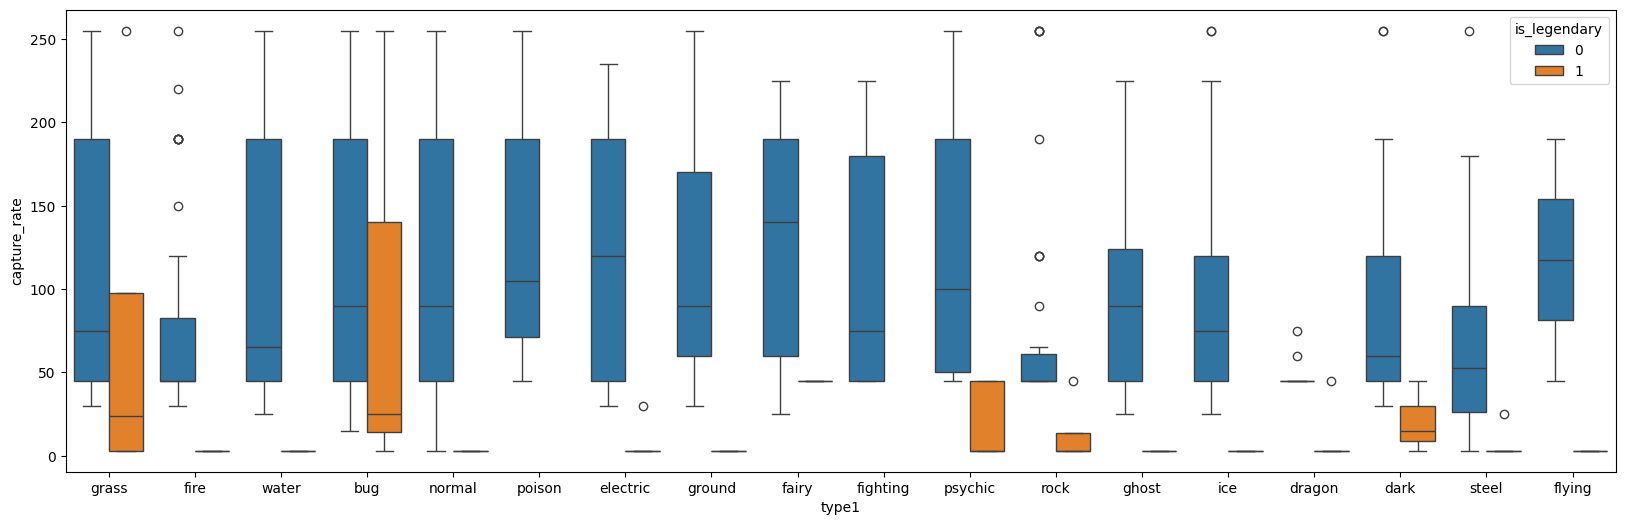

In [32]:
plt.figure(figsize=(20,6))
sns.boxplot(x='type1',y='capture_rate',hue='is_legendary',data=df)

### Correlation Analysis (HeatMaps)

<Axes: >

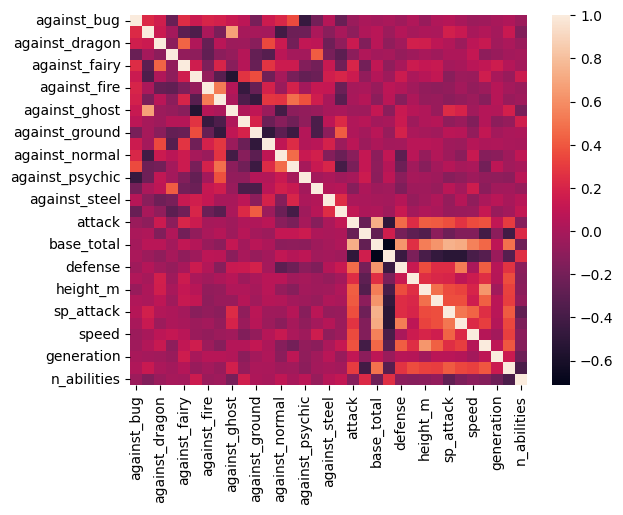

In [33]:
sns.heatmap(df.select_dtypes(include=['float', 'int']).corr())

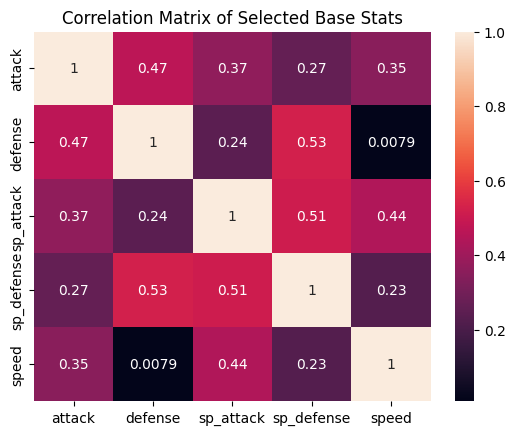

In [34]:
sns.heatmap(df[['attack', 'defense', 'sp_attack', 'sp_defense', 'speed']].corr() , annot=True)
plt.title('Correlation Matrix of Selected Base Stats')
plt.show()

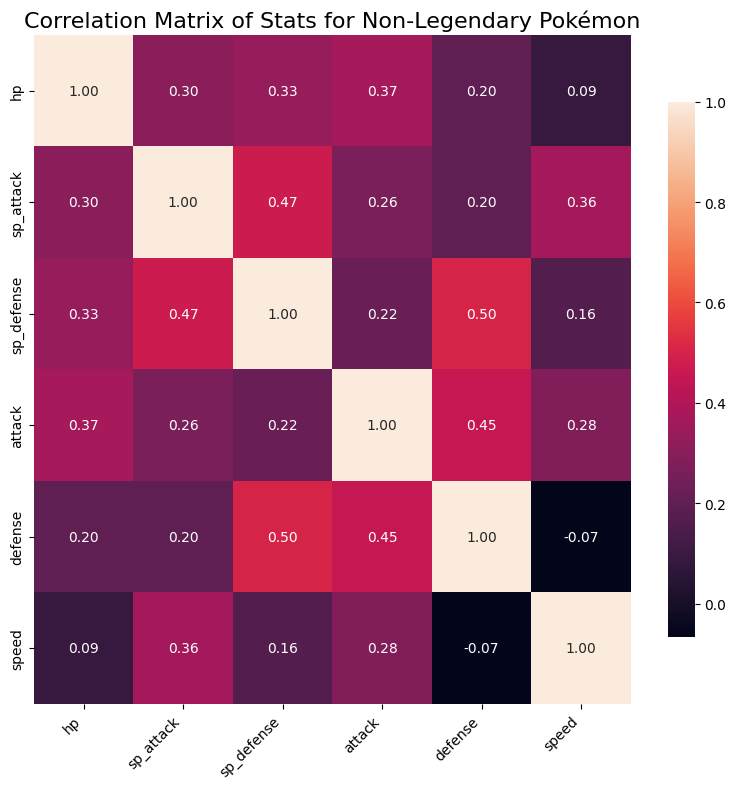

In [35]:
plt.figure(figsize=(8, 8))
sns.heatmap(
    df[df['is_legendary'] == 0][['hp', 'sp_attack', 'sp_defense', 'attack', 'defense', 'speed']].corr(),
    annot=True,
    fmt=".2f",
    cbar_kws={'shrink': 0.8}
)
plt.title('Correlation Matrix of Stats for Non-Legendary Pokémon', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

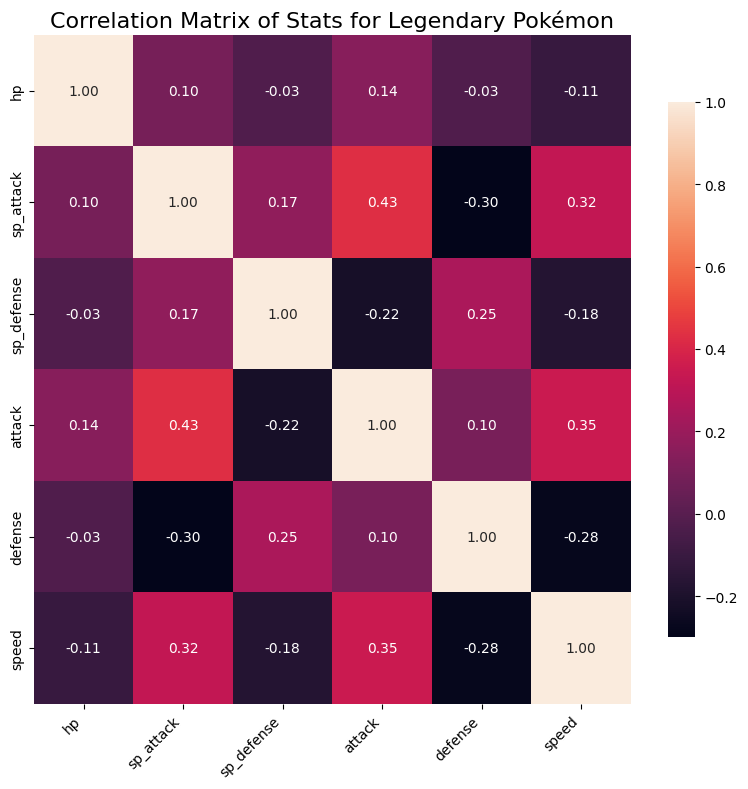

In [36]:
plt.figure(figsize=(8, 8))
sns.heatmap(
    df[df['is_legendary'] == 1][['hp', 'sp_attack', 'sp_defense', 'attack', 'defense', 'speed']].corr(),
    annot=True,
    fmt=".2f",
    cbar_kws={'shrink': 0.8}
)
plt.title('Correlation Matrix of Stats for Legendary Pokémon', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

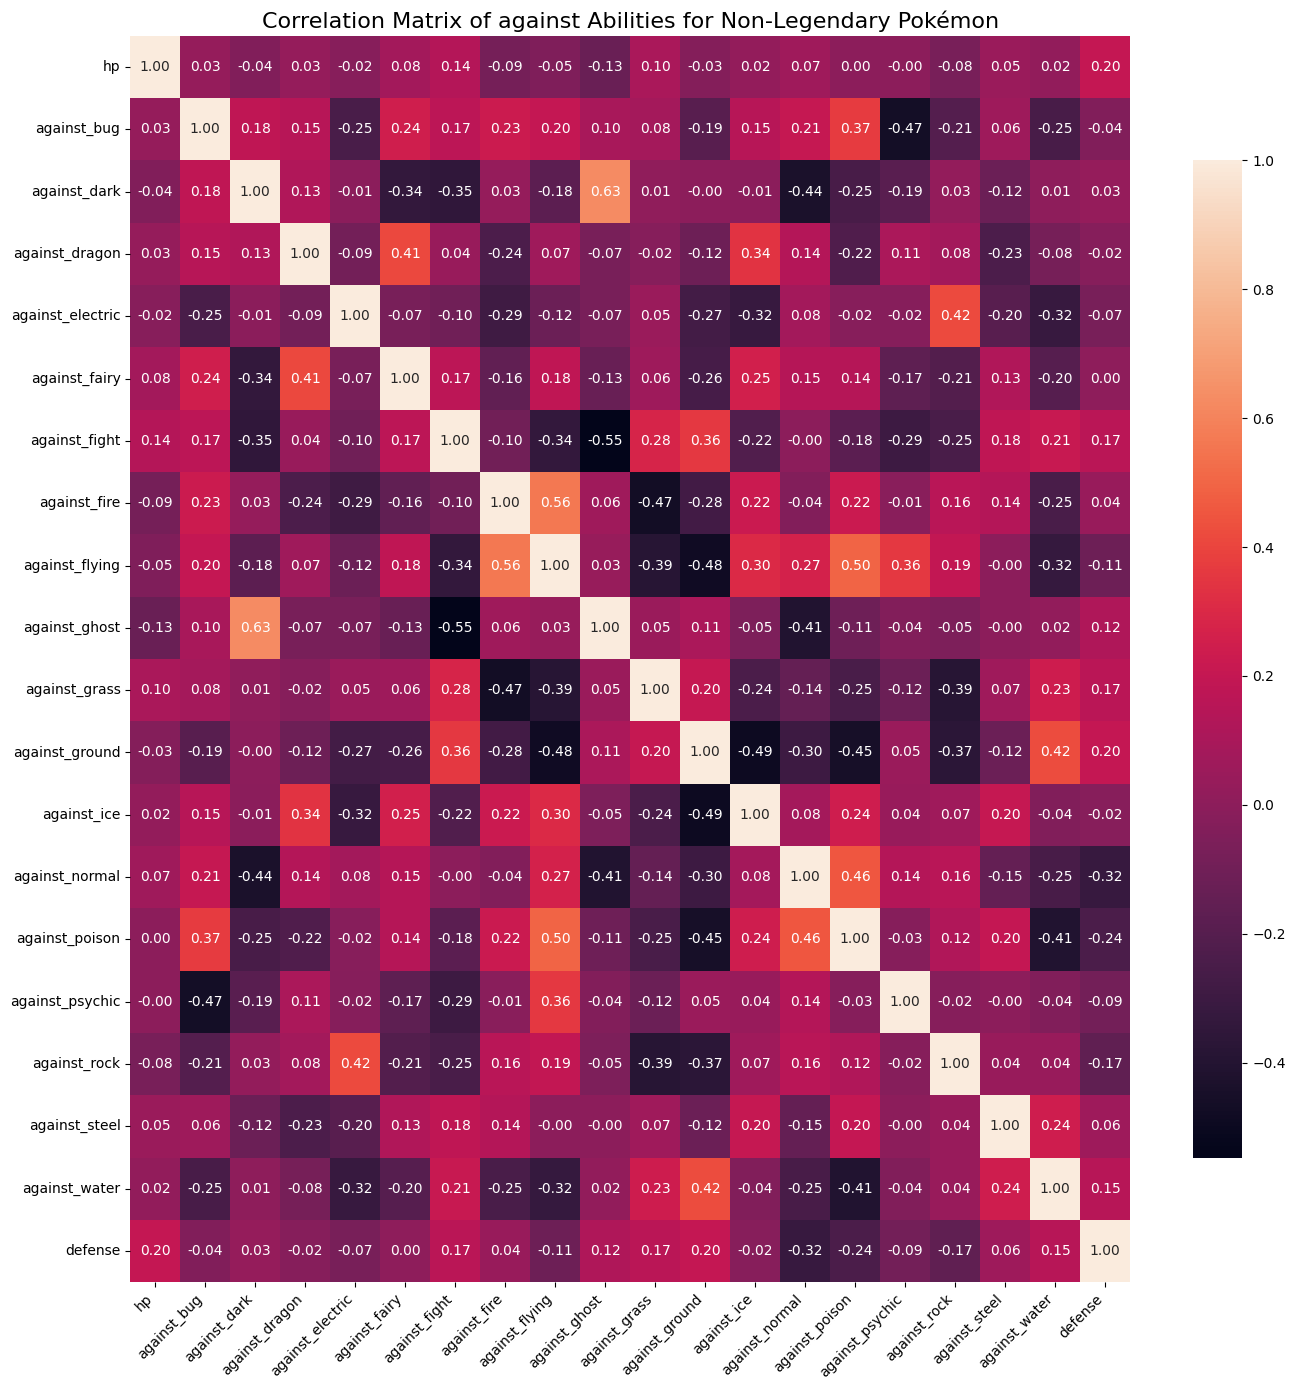

In [37]:
plt.figure(figsize=(14, 14))
sns.heatmap(
    df[df['is_legendary'] == 0][['hp', 'against_bug', 'against_dark', 'against_dragon',
    'against_electric', 'against_fairy', 'against_fight', 'against_fire',
    'against_flying', 'against_ghost', 'against_grass', 'against_ground',
    'against_ice', 'against_normal', 'against_poison', 'against_psychic',
    'against_rock', 'against_steel', 'against_water' , 'defense'
    ]].corr(),
    annot=True,
    fmt=".2f",
    cbar_kws={'shrink': 0.8}
)
plt.title('Correlation Matrix of against Abilities for Non-Legendary Pokémon', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

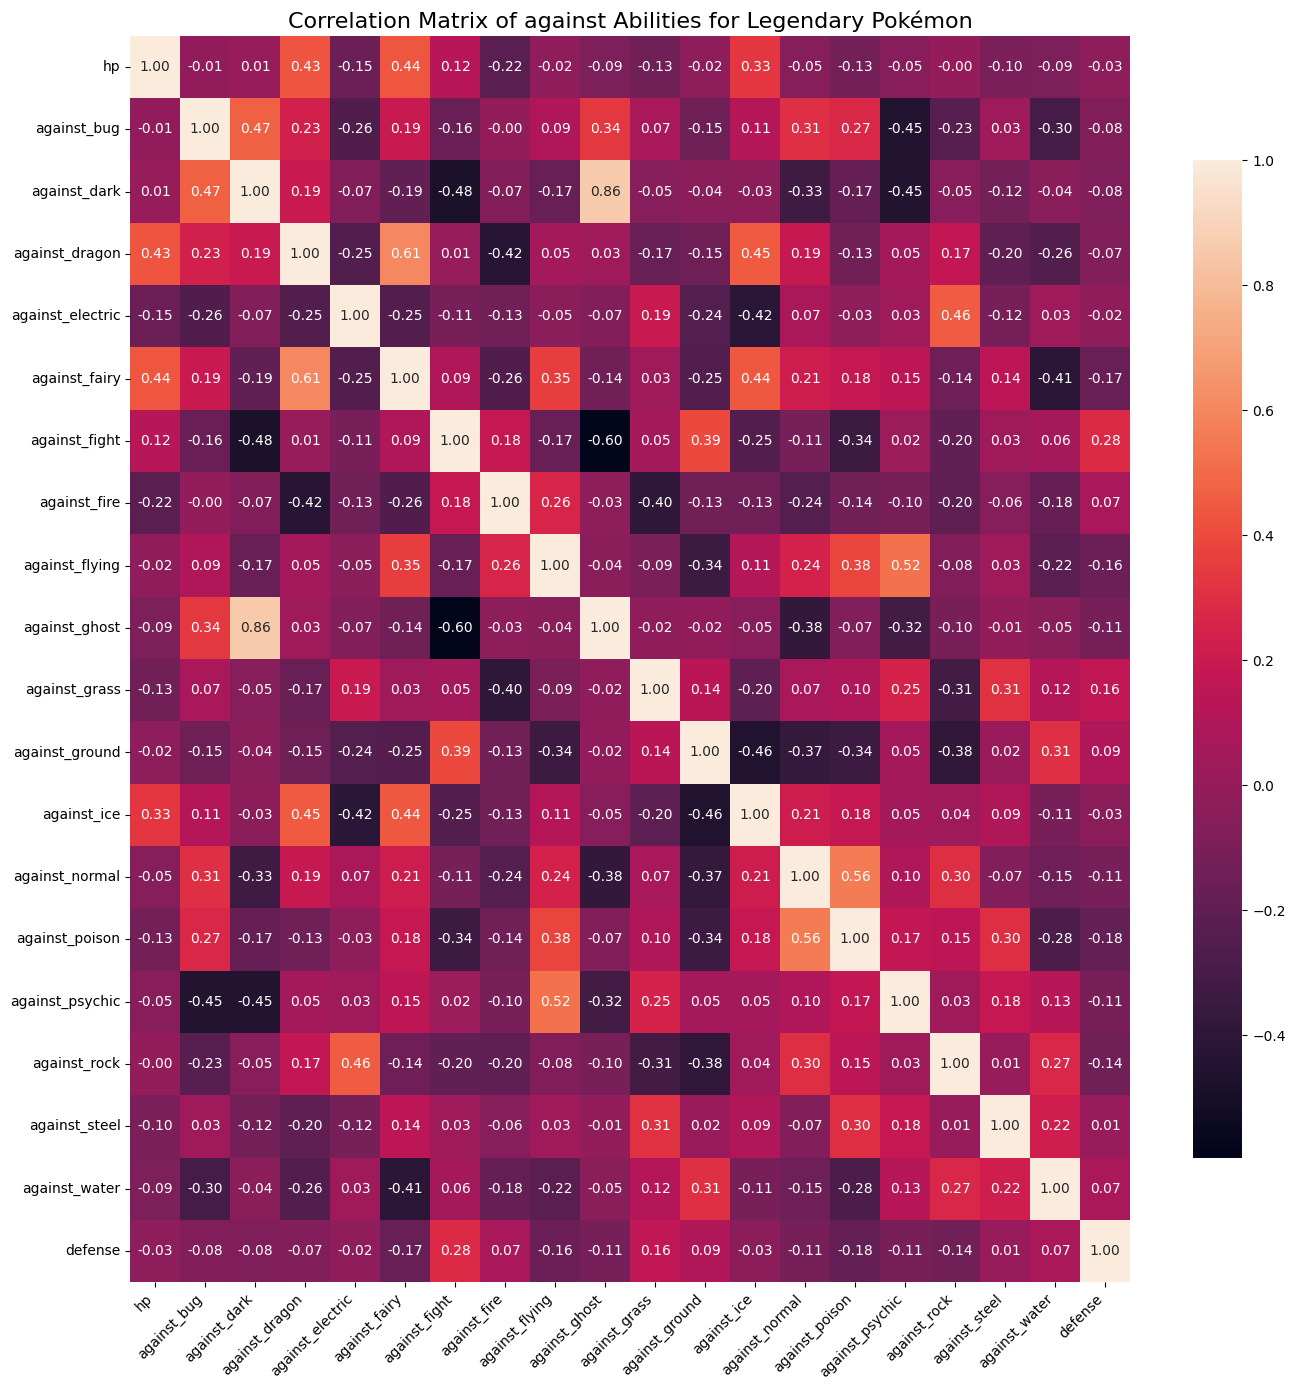

In [38]:
plt.figure(figsize=(14, 14))
sns.heatmap(
    df[df['is_legendary'] == 1][['hp', 'against_bug', 'against_dark', 'against_dragon',
    'against_electric', 'against_fairy', 'against_fight', 'against_fire',
    'against_flying', 'against_ghost', 'against_grass', 'against_ground',
    'against_ice', 'against_normal', 'against_poison', 'against_psychic',
    'against_rock', 'against_steel', 'against_water' , 'defense'
    ]].corr(),
    annot=True,
    fmt=".2f",
    cbar_kws={'shrink': 0.8}
)
plt.title('Correlation Matrix of against Abilities for Legendary Pokémon', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Data Preprocessing

In [39]:
# Select features and target
X = df[[ 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed', 'base_total']]
y = df['is_legendary']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

In [40]:
# checking the shape
print(X_train.shape)
print(X_test.shape)

(640, 6)
(161, 6)


In [41]:
print(y_train.shape)
print(y_test.shape)

(640,)
(161,)


In [42]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [43]:
print(X_train_scaled.shape)
print(X_test_scaled.shape)

(640, 6)
(161, 6)


## Predictive Modeling - Model building and evaluation

Model 1 - Randome Forest Classifier

In [ ]:
clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)

# Model evaluation
print('Accuracy:', accuracy_score(y_test, y_pred))
print('\nConfusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('\nClassification Report:\n', classification_report(y_test, y_pred))

Accuracy: 0.9751552795031055

Confusion Matrix:
 [[143   1]
 [  3  14]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       144
           1       0.93      0.82      0.87        17

    accuracy                           0.98       161
   macro avg       0.96      0.91      0.93       161
weighted avg       0.97      0.98      0.97       161



Model 2 - Gaussian Naive Bayes Classifier

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)
y_pred = gnb.predict(X_test_scaled)

# Model evaluation
print('Accuracy:', accuracy_score(y_test, y_pred))
print('\nConfusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('\nClassification Report:\n', classification_report(y_test, y_pred))


Accuracy: 0.968944099378882

Confusion Matrix:
 [[140   4]
 [  1  16]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       144
           1       0.80      0.94      0.86        17

    accuracy                           0.97       161
   macro avg       0.90      0.96      0.92       161
weighted avg       0.97      0.97      0.97       161



Model 2.5 - Gaussian Naive Bayes Classifier with hyper-parameters

In [ ]:
# Define the parameter grid
param_grid = {'var_smoothing': np.logspace(0,-9, num=200)}
gnb = GaussianNB()

# Setup the GridSearchCV
grid_search = GridSearchCV(gnb, param_grid, cv=5, scoring='accuracy')

# Fit the model with the best parameters
grid_search.fit(X_train_scaled, y_train)
best_var_smoothing = grid_search.best_params_['var_smoothing']
print(f'Best var_smoothing parameter: {best_var_smoothing}')

# Train the model with the best parameters
best_gnb = GaussianNB(var_smoothing=best_var_smoothing)
best_gnb.fit(X_train_scaled, y_train)
y_pred = best_gnb.predict(X_test_scaled)

# Model evaluation
print('Accuracy:', accuracy_score(y_test, y_pred))
print('\nConfusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('\nClassification Report:\n', classification_report(y_test, y_pred))


Best var_smoothing parameter: 0.3180625692794119
Accuracy: 0.9627329192546584

Confusion Matrix:
 [[140   4]
 [  2  15]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       144
           1       0.79      0.88      0.83        17

    accuracy                           0.96       161
   macro avg       0.89      0.93      0.91       161
weighted avg       0.97      0.96      0.96       161



Model 3 - XG Boost Classifier

In [ ]:
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_clf.fit(X_train_scaled, y_train)
y_pred = xgb_clf.predict(X_test_scaled)

# Model evaluation
print('Accuracy:', accuracy_score(y_test, y_pred))
print('\nConfusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('\nClassification Report:\n', classification_report(y_test, y_pred))

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=set(y_test), yticklabels=set(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Accuracy: 0.9813664596273292

Confusion Matrix:
 [[143   1]
 [  2  15]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       144
           1       0.94      0.88      0.91        17

    accuracy                           0.98       161
   macro avg       0.96      0.94      0.95       161
weighted avg       0.98      0.98      0.98       161



Model 3.5 - XG Boost Classifier with hyper-parameters

In [ ]:
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [ 5, 7, 10],
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'gamma': [0, 0.1, 0.5, 1]
}

# Setup GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(xgb_clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model with the grid search
grid_search.fit(X_train_scaled, y_train)
best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}')

# Train the model with the best parameters
best_xgb_clf = xgb.XGBClassifier(**best_params, use_label_encoder=False, eval_metric='mlogloss')
best_xgb_clf.fit(X_train_scaled, y_train)
y_pred = best_xgb_clf.predict(X_test_scaled)

# Model evaluation
print('Accuracy:', accuracy_score(y_test, y_pred))
print('\nConfusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('\nClassification Report:\n', classification_report(y_test, y_pred))


Best Parameters: {'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}
Accuracy: 0.9751552795031055

Confusion Matrix:
 [[143   1]
 [  3  14]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       144
           1       0.93      0.82      0.87        17

    accuracy                           0.98       161
   macro avg       0.96      0.91      0.93       161
weighted avg       0.97      0.98      0.97       161



### **Best Model**

Model 3 - XG Boostt Classifier has the highst Accuracy , **98.1366 %**

Accuracy: 0.9813664596273292

Confusion Matrix:
 [[143   1]
 [  2  15]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       144
           1       0.94      0.88      0.91        17

    accuracy                           0.98       161
   macro avg       0.96      0.94      0.95       161
weighted avg       0.98      0.98      0.98       161



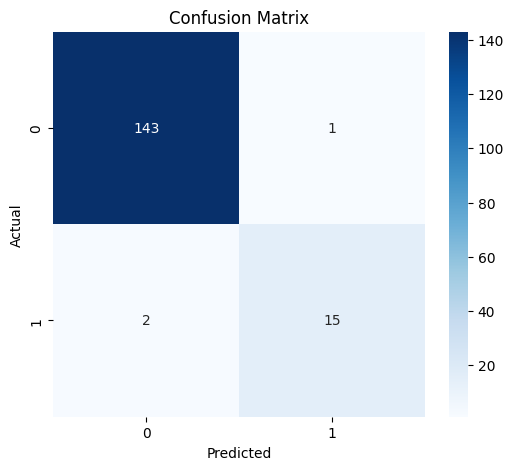

In [47]:
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_clf.fit(X_train_scaled, y_train)
y_pred = xgb_clf.predict(X_test_scaled)

# Model evaluation
print('Accuracy:', accuracy_score(y_test, y_pred))
print('\nConfusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('\nClassification Report:\n', classification_report(y_test, y_pred))

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=set(y_test), yticklabels=set(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()